# Custom indicator example

In [6]:
import yfinance as yf

from mplchart.chart import Chart

from mplchart.library import get_series, calc_ema
from mplchart.primitives import Candlesticks, OHLC, Volume

from dataclasses import dataclass

In [7]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-03-29 00:00:00-04:00,45.687291,45.747460,45.376819,45.716171,94256000,0.0,0.0
2019-04-01 00:00:00-04:00,46.122903,46.132528,45.338304,46.026634,111448000,0.0,0.0
2019-04-02 00:00:00-04:00,45.990530,46.801607,45.980905,46.695709,91062800,0.0,0.0
2019-04-03 00:00:00-04:00,46.510397,47.292590,46.486328,47.015816,93087200,0.0,0.0
2019-04-04 00:00:00-04:00,46.881032,47.261298,46.483920,47.097641,76457200,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,171.759995,173.050003,170.059998,172.279999,71106600,0.0,0.0
2024-03-25 00:00:00-04:00,170.570007,171.940002,169.449997,170.850006,54288300,0.0,0.0
2024-03-26 00:00:00-04:00,170.000000,171.419998,169.580002,169.710007,57388400,0.0,0.0


In [8]:
@dataclass
class DEMA:
    """Double Exponential Moving Average"""

    period: int = 20

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2

In [9]:
res = DEMA(20)(prices)
res.tail()

Date
2024-03-22 00:00:00-04:00    171.751517
2024-03-25 00:00:00-04:00    171.269705
2024-03-26 00:00:00-04:00    170.664687
2024-03-27 00:00:00-04:00    170.813823
2024-03-28 00:00:00-04:00    170.626573
Name: close, dtype: float64

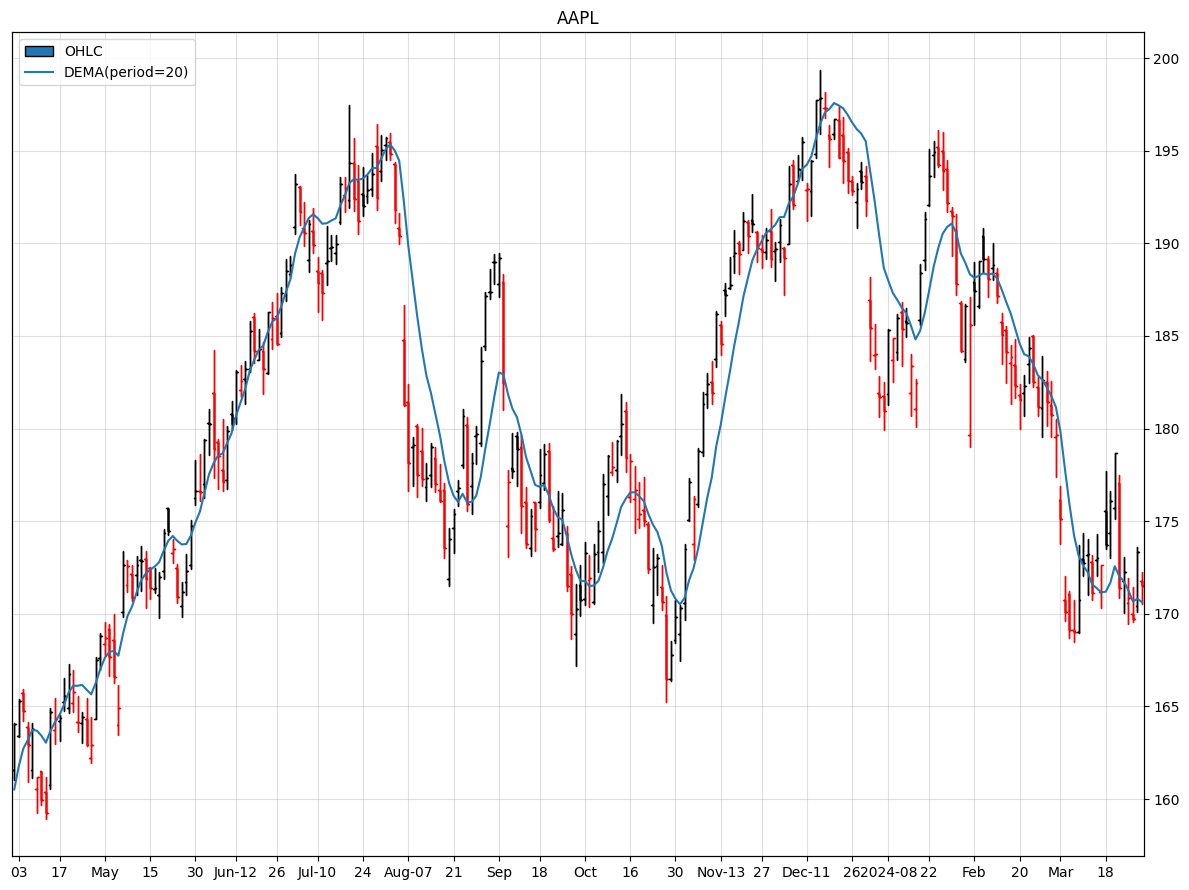

In [10]:
max_bars = 250

indicators = [
    OHLC(),
    DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)